# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle

#home_folder = '/home/hkorre/Documents/proj2/'   #Linux VM
home_folder = '/home/'                          #Docker Image

# TODO: fill this in based on where you saved the training and testing data
training_file = home_folder + 'traffic-signs/lab2_data/train.p'
testing_file  = home_folder + 'traffic-signs/lab2_data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print('Success: Data loaded.')

Success: Data loaded.


In [2]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = X_train.shape[0]

# TODO: number of testing examples
n_test = X_test.shape[0]

# TODO: what's the shape of an image?
image_shape = (X_train.shape[1], X_train.shape[2])

# TODO: how many classes are in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


This image is: <class 'numpy.ndarray'> with dimesions: (32, 32, 3)
Showing image # 20000 ...


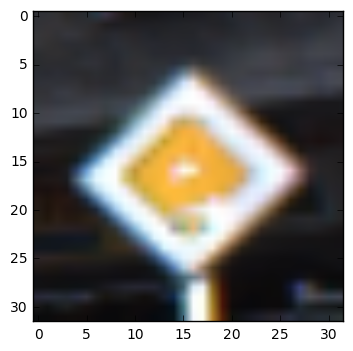

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
#from PIL import Image

%matplotlib inline

# grab an image
image_num = 20000
image = X_train[image_num,:,:,:]

# Show image
print('This image is:', type(image), 'with dimesions:', image.shape)
print('Showing image #', image_num, '...')
plt.imshow(image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image

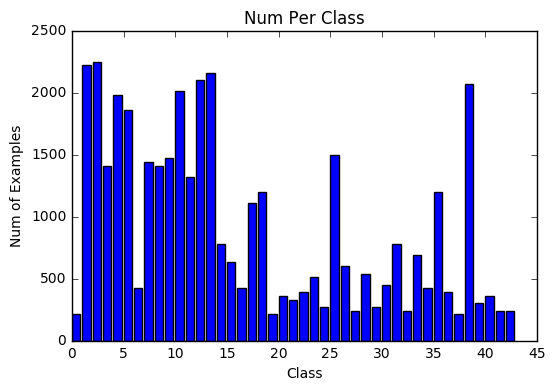

In [4]:
# Plot image type distribution
import numpy as np

def plot_examples_per_class(labels_):
    values, counts = np.unique(labels_, return_counts=True)
    plt.figure()
    plt.bar(values, counts)
    plt.ylabel('Num of Examples')
    plt.xlabel('Class')
    plt.title('Num Per Class')
    
plot_examples_per_class(y_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [5]:
from sklearn.preprocessing import LabelBinarizer


### Grayscale the images #########################################
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def grayscale_features(dataset_, num_samples_, image_shape_):
    gray = np.empty([num_samples_, image_shape_[0], image_shape_[1]], dtype=dataset_.dtype)
    for index in range(0, num_samples_):
        gray[index,:,:] = grayscale(dataset_[index,:,:,:])
    
    return gray


### Data Flattening ##############################################
def flatten_features(gray_, num_samples_, image_shape_):
    flat = np.empty([num_samples_, image_shape_[0]*image_shape_[1]], dtype=gray_.dtype)
    for index in range(0, num_samples_):
        flat[index,:] = gray_[index,:,:].flatten()
        
    return flat


### Data Normalization ###########################################
def normalize_features(img_):
    #change type to np.float32 to accomodate negative numbers
    #  and get ready for further math
    normalized = (img_.astype(np.float32) - 128)/128    
    return normalized

def normalize_features_pos(img_):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    out_min = 0.1
    out_max = 0.9
    greyscale_min = 0
    greyscale_max = 255
    
    slope = (out_max - out_min)/( greyscale_max - greyscale_min )
    b = out_min
    return slope*(img_.astype(np.float32) - greyscale_min) + out_min


### One Hot Encode the labels ######################################

# Turn labels into numbers and apply One-Hot Encoding
# i.e. each solution is turned into a unit row vector
def oneHotEncode_labels(labels_):
    encoder = LabelBinarizer()
    one_hot_encoded = encoder.fit_transform(labels_)

    return one_hot_encoded


print('Success: Preprocessing functions loaded.')

Success: Preprocessing functions loaded.


In [6]:
# Preprocess Data
X_train_gray = grayscale_features(X_train, n_train, image_shape)
X_train_norm = normalize_features_pos(X_train_gray)
y_train_OHE = oneHotEncode_labels(y_train)

X_test_gray = grayscale_features(X_test, n_test, image_shape)
X_test_norm = normalize_features_pos(X_test_gray)
y_test_OHE = oneHotEncode_labels(y_test)

print('Success: Data preprocessed.')

Success: Data preprocessed.


### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

For the data:
1. Switch to grayscale
  * I did this primarily because the authors of "Traffic Sign Recognition with Multi-Scale Convolutional Networks" said that's what gave them the best results.
  * My general intuition is that since the colors are so blurry and and seem to have color distortion, it's best for the convNet to not focus on that part.
  * Also, grayscale makes for less data, which makes the training run faster.
2. Normalize the data between 0.1-0.9
  * As we learned in the lecture, keeping the training values close to 0 gives better numerical stability and keeps the optimizer from having to do a lot of searching to find the solution.

For the labels:
* One-hot-encode the labels

In [ ]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [7]:
# Function to generate transformed images
# from https://nbviewer.jupyter.org/github/vxy10/SCND_notebooks/blob/master/preprocessing_stuff/img_transform_NB.ipynb

def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img

print('Success: transform_image function loaded.')

Success: transform_image function loaded.


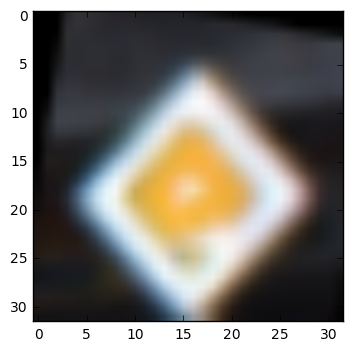

In [8]:
# Example transformation
image = X_train[image_num,:,:,:]
image = transform_image(image,20,10,5)
plt.imshow(image)

working on class # 0 ...
working on class # 1 ...
working on class # 2 ...
working on class # 3 ...
working on class # 4 ...
working on class # 5 ...
working on class # 6 ...
working on class # 7 ...
working on class # 8 ...
working on class # 9 ...
working on class # 10 ...
working on class # 11 ...
working on class # 12 ...
working on class # 13 ...
working on class # 14 ...
working on class # 15 ...
working on class # 16 ...
working on class # 17 ...
working on class # 18 ...
working on class # 19 ...
working on class # 20 ...
working on class # 21 ...
working on class # 22 ...
working on class # 23 ...
working on class # 24 ...
working on class # 25 ...
working on class # 26 ...
working on class # 27 ...
working on class # 28 ...
working on class # 29 ...
working on class # 30 ...
working on class # 31 ...
working on class # 32 ...
working on class # 33 ...
working on class # 34 ...
working on class # 35 ...
working on class # 36 ...
working on class # 37 ...
working on class # 38 

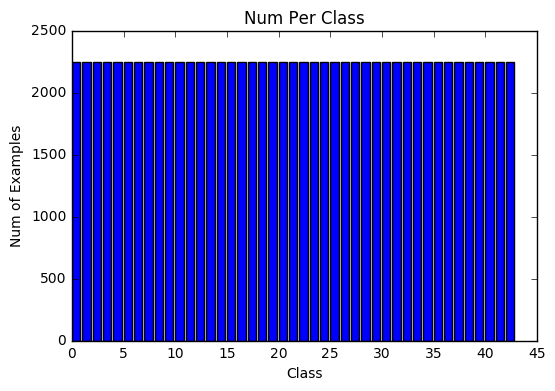

In [9]:
# figure out what's the max number of examples a class has
values, counts = np.unique(y_train, return_counts=True)
max_counts = counts.max()

for class_ in values:
    print('working on class #', class_, '...')
    num_img_needed = max_counts-counts[class_]
    
    first_example_index = next(index for index, val in enumerate(y_train) if val==class_)
    first_example = X_train[first_example_index]
    
    class_ = class_.reshape([1])
    
    for num in range(0,num_img_needed):
        transformed_example = transform_image(first_example,20,10,5)
        transformed_example = transformed_example.reshape([1, 32, 32, 3])
        X_train = np.concatenate([X_train, transformed_example])
        y_train = np.concatenate([y_train, class_])


plot_examples_per_class(y_train)

In [11]:
# Save the data for easy access
import os

pickle_file = 'transformed_data.pickle'
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open('transformed_data.pickle', 'wb') as pfile:
            pickle.dump(
                {
                    'X_train': X_train,
                    'y_train': y_train,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

Saving data to pickle file...
Data cached in pickle file.


In [31]:
# Reload the data
pickle_file = 'transformed_data.pickle'
with open(pickle_file, 'rb') as f:
    pickle_data = pickle.load(f)
    X_train = pickle_data['X_train']
    y_train = pickle_data['y_train']
    del pickle_data  # Free up memory

print('Data and modules loaded.')

Data and modules loaded.


In [32]:
# re-preprocess the training data
X_train_gray = grayscale_features(X_train, X_train.shape[0], image_shape)
X_train_norm = normalize_features_pos(X_train_gray)
y_train_OHE = oneHotEncode_labels(y_train)

print('Success: Training data preprocessed.')

Success: Training data preprocessed.


In [33]:
from sklearn.model_selection import train_test_split
from random import randint

### Split into train and validation sets ###########################
def split_training(x_train_, y_train_):
    (train_features, valid_features, train_labels, valid_labels) = \
      train_test_split(x_train_, y_train_, test_size=0.05, random_state=832289, stratify=y_train_)
        
    return (train_features, valid_features, train_labels, valid_labels)

def split_training_rand(x_train_, y_train_):
    rand_min = 0
    rand_max = 832289
    
    (train_features, valid_features, train_labels, valid_labels) = \
      train_test_split(x_train_, y_train_, test_size=0.05, random_state=randint(rand_min,rand_max), stratify=y_train_)
        
    return (train_features, valid_features, train_labels, valid_labels)


print('Success: Data split functions loaded.')

Success: Data split functions loaded.


In [34]:
(train_features, valid_features, train_labels, valid_labels) = \
  split_training_rand(X_train_norm, y_train_OHE)

test_features = X_test_norm
test_labels = y_test_OHE

print('Success: Data sets generated.')

Success: Data sets generated.


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

I split the training set into training and validation. I also do the following:
* Small validation set (~5%)
* My split training function uses the train_test_split() function. Instead of hardcoding the 'random_state' variable, I use randInt() to actually feed in a random number to the generator to get different split of the data every time I test.
* Stratify the data to make sure to get the same proportions in validation data as in training data

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [35]:
# Convolutional Neural Network
# Based on https://github.com/aymericdamien/TensorFlow-Examples - convolutional_network
# and "Traffice Sign Recognition with Multi-Scale Convolutional Networks" by Sermanet & LeCun

import tensorflow as tf
import matplotlib.pyplot as plt



# Parameters
n_hidden_1 = 128    # 1st layer number of features
n_hidden_2 = 128    # 2nd layer number of features

# Network Parameters
n_input = image_shape[0]*image_shape[1]  # data input (img shape: 32*32)
n_classes = n_classes                    # total classes (0-42 digits = 43)
dropout = 0.75                           # Dropout, probability to keep units

init_stdev = 0.05


# Sizing parameters
pool_sizeNstride   = 2               #pooling size & stride

input_channels     = 1               #grayscale
input_size         = image_shape[0]  #size of 1 side of input square

wc1_convoSize      = 5               #size of 1 side of convo sq  
wc1_outDepth       = 16              #convo output depth
wc1_outSize        = int(input_size/pool_sizeNstride)  #size of 1 size of output sq

wc2_convoSize      = 5
wc2_outDepth       = 32
wc2_outSize        = int(wc1_outSize/pool_sizeNstride)

wc1_total          = wc1_outSize*wc1_outSize*wc1_outDepth
wc2_total          = wc2_outSize*wc2_outSize*wc2_outDepth
multiscale_len     = wc1_total + wc2_total      #mutli-scale feature results


# tf Graph input
x = tf.placeholder(tf.float32, [None, image_shape[0], image_shape[1]])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32)             #dropout (keep probability)


# Down-sampling
def maxpool2d(x_, k_=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x_, ksize=[1, k_, k_, 1], strides=[1, k_, k_, 1],
                          padding='SAME')

    # x shape = shape [batch, height, width, channels]
    # ksize   = window in each dimension
    # strides = stride in each dimension


# Create some wrappers for simplicity
def conv2d(x_, W_, b_, drop_, strides_=1):
    x = tf.nn.conv2d(x_, W_, strides=[1, strides_, strides_, 1], padding='SAME')
    # x/input shape  = [batch, in_height, in_width, in_channels]
    # w/filter shape = [filter_height, filter_width, in_channels, out_channels]
    # stride shape   = [batch, in_height, in_width, in_channels]
    
    x = tf.nn.bias_add(x, b_)
    x = tf.nn.relu(x)
    x = tf.nn.dropout(x, drop_)
    x = maxpool2d(x, pool_sizeNstride)    
    return x


    
# Create model
def model(x_, weights_, biases_, dropout_):
    # Reshape input picture
    x = tf.reshape(x_, shape=[-1, image_shape[0], image_shape[1], 1])

    # Convolution Layer 1
    conv1 = conv2d(x, weights_['wc1'], biases_['bc1'], dropout_)
    
    # Convolution Layer 2
    conv2 = conv2d(conv1, weights_['wc2'], biases_['bc2'], dropout_)
    
    # Input to classifier
    flat1 = tf.reshape(conv1, [-1, wc1_total])  #row size should be batch size
    flat2 = tf.reshape(conv2, [-1, wc2_total])  #row size should be batch size
    classifier_input = tf.concat(1, [flat1, flat2])  #should concat the rows
    
    # Hidden layer with RELU activation
    h1 = tf.add(tf.matmul(classifier_input, weights['wh1']), biases['bh1'])      #WX+b
    h1 = tf.nn.relu(h1)
    h1 = tf.nn.dropout(h1, dropout_)
    
    # Hidden layer with RELU activation
    h2 = tf.add(tf.matmul(h1, weights['wh2']), biases['bh2'])     #WX+b
    h2 = tf.nn.relu(h2)
    h2 = tf.nn.dropout(h2, dropout_)
    
    # Output, 'classifier'
    out = tf.add(tf.matmul(h2, weights_['out']), biases_['out'])
    return out



# Store layers weight & bias

#w/filter shape = [filter_height, filter_width, in_channels, out_channels]
weights = {
    'wc1': tf.Variable(tf.random_normal([wc1_convoSize, wc1_convoSize, input_channels, wc1_outDepth], stddev=init_stdev)),
    'wc2': tf.Variable(tf.random_normal([wc2_convoSize, wc2_convoSize, wc1_outDepth, wc2_outDepth], stddev=init_stdev)),
    'wh1': tf.Variable(tf.random_normal([multiscale_len, n_hidden_1], stddev=init_stdev)),
    'wh2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev=init_stdev)),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes], stddev=init_stdev))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([wc1_outDepth], stddev=init_stdev)),
    'bc2': tf.Variable(tf.random_normal([wc2_outDepth], stddev=init_stdev)),
    'bh1': tf.Variable(tf.random_normal([n_hidden_1], stddev=init_stdev)),
    'bh2': tf.Variable(tf.random_normal([n_hidden_2], stddev=init_stdev)),
    'out': tf.Variable(tf.random_normal([n_classes], stddev=init_stdev))
}


# Construct model
pred = model(x, weights, biases, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))


# L2 regularization for the fully connected parameters.
regularizers = tf.nn.l2_loss(weights['wc1']) + tf.nn.l2_loss(biases['bc1']) + \
               tf.nn.l2_loss(weights['wc2']) + tf.nn.l2_loss(biases['bc2']) + \
               tf.nn.l2_loss(weights['wh1']) + tf.nn.l2_loss(biases['bh1']) + \
               tf.nn.l2_loss(weights['wh2']) + tf.nn.l2_loss(biases['bh2']) + \
               tf.nn.l2_loss(weights['out']) + tf.nn.l2_loss(biases['out'])
# Add the regularization term to the loss.
beta = 5e-4  #0.0001
cost += beta * regularizers



print('Success: ConvNet defined.')

Success: ConvNet defined.


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My model looks like:
* ConvNet 1: 5x5 with 16 depth and 2x2 max pooling
* ConvNet 2: 5x5 with 32 depth and 2x2 max pooling
* Hidden Layer 1: 128 neurons
* Hidden Layer 2: 128 neurons
* Logit Layer: 43 neurons (1 for each of the different classes)

The ConvNet and Hidden Layers all have:
* relu
* dropout

I have L2 regularization on all weigths and biases.
I initialize the weights and biases with a small stddev (0.05) to make sure a weight doesn't accidentally dominate because of it's initial conditions.
I use the default learning rate from the Adam optimizer.

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

Epoch: 0001 cost= 0.96830, Training Accuracy= 0.81583
Epoch: 0011 cost= 0.30875, Training Accuracy= 0.98594
Epoch: 0021 cost= 0.29129, Training Accuracy= 0.98842
Epoch: 0031 cost= 0.26663, Training Accuracy= 0.99194
Epoch: 0041 cost= 0.26533, Training Accuracy= 0.99049
Epoch: 0051 cost= 0.25597, Training Accuracy= 0.99339
Epoch: 0061 cost= 0.25850, Training Accuracy= 0.99359
Epoch: 0071 cost= 0.27426, Training Accuracy= 0.98698
Epoch: 0081 cost= 0.25110, Training Accuracy= 0.99421
Epoch: 0091 cost= 0.25425, Training Accuracy= 0.99277
Epoch: 0101 cost= 0.23797, Training Accuracy= 0.99587
Optimization Finished!
Accuracy: 0.928266
Model saved in file: model.ckpt


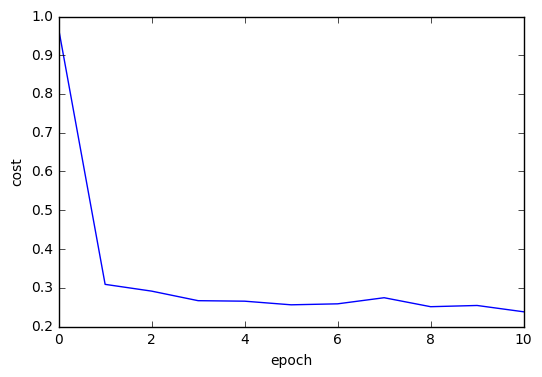

In [38]:
# Tune-ing variables
training_epochs = 101
batch_size = 100

# Display variables
display_step = 10
cost_batch = []     # plotting array

optimizer = tf.train.AdamOptimizer().minimize(cost)

# Evaluate model
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Initializing the variables
init = tf.initialize_all_variables()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):

        total_batch = int(train_features.shape[0]/batch_size)
        
        # Loop over all batches            
        for batch_i in range(total_batch):
            #batch_x, batch_y = mnist.train.next_batch(batch_size)
            batch_start = batch_i*batch_size
            batch_x = train_features[batch_start:batch_start + batch_size]
            batch_y = train_labels[batch_start:batch_start + batch_size]
            
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})         
        
        # Display logs per epoch step
        if epoch % display_step == 0:
            # run validation set
            c, acc = sess.run([cost, accuracy], feed_dict={x: valid_features, y: valid_labels, keep_prob: 1.})
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.5f}".format(c) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc))
            cost_batch.append(c)
          
    print("Optimization Finished!")

    
    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy - run test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: test_features, y: test_labels, keep_prob: 1.}))

    # Save the variables to disk
    save_path = saver.save(sess, "model.ckpt")
    print("Model saved in file: %s" % save_path)
    
    # plot
    plt.plot(cost_batch)
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.show()



### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I use a Adam Optimizer, so I can get automatic adjustable learning_rate and get momentum.
My batch size is 101 and I run 100 epochs. I got to these numbers through trial and error.

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

In order:
* I made a 2 layer perceptron model.
* Then I made a three layer perceptron model.
* Then I added the ConvNet.
* Then I added dropout
* Then I added L2 regularization

At each step, I optimized the parameters to get the best test accuracy

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [39]:
def img_import(file_path_):
    image = mpimg.imread(file_path_)
    
    # make the image small in the middle
    image = cv2.resize(image, (22, 22), interpolation = cv2.INTER_AREA)
    
    # make a border around the edge 
    bordersize=5
    image=cv2.copyMakeBorder(image, top=bordersize, bottom=bordersize, \
                              left=bordersize, right=bordersize, \
                              borderType= cv2.BORDER_CONSTANT, \
                              value=[0,0,0] )
    return image


print('Success: new image helper functions defined.')

Success: new image helper functions defined.


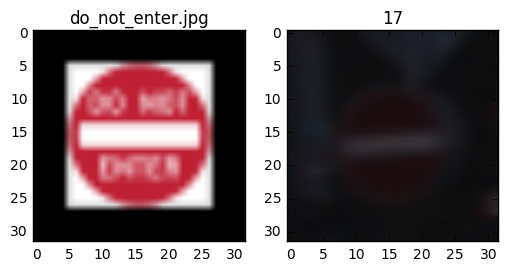

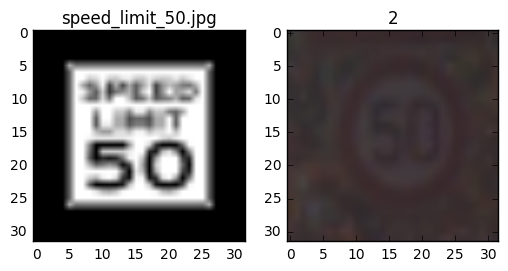

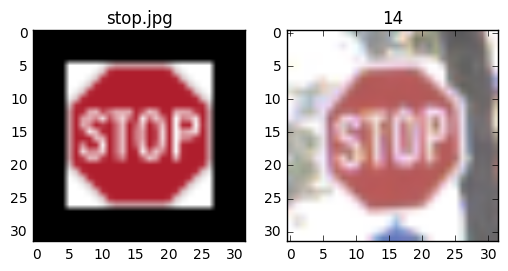

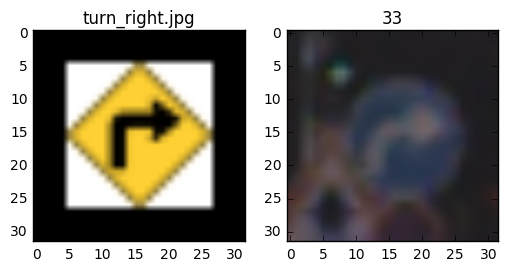

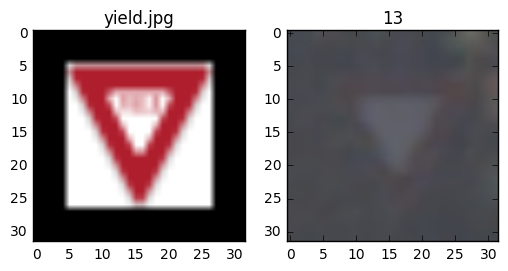

In [40]:
# Load and show images
# images from https://en.wikipedia.org/wiki/Road_signs_in_the_United_States

img_folder = home_folder + 'traffic-signs/new_images/'

img_names = []
img_names.append('do_not_enter.jpg')
img_names.append('speed_limit_50.jpg')
img_names.append('stop.jpg')
img_names.append('turn_right.jpg')
img_names.append('yield.jpg')

img_values = {}
img_values['do_not_enter.jpg']   = 17   #no entry
img_values['speed_limit_50.jpg'] = 2    #Speed limit (50km/h)
img_values['stop.jpg']           = 14   #Stop
img_values['turn_right.jpg']     = 33   #Turn right ahead
img_values['yield.jpg']          = 13   #Yield

extra_imgs = np.zeros([len(img_names),32,32,3], dtype=np.uint8)
extra_labels = []

for index, name in enumerate(img_names):
    extra_imgs[index] = img_import(img_folder + name)
    fig = plt.figure()
    a=fig.add_subplot(1,2,1)
    a.set_title(name)
    plt.imshow(extra_imgs[index])
    
    # display an image from the training set that matches
    img_val = img_values[name]
    extra_labels.append(img_val)
    training_index = next(index for index, val in enumerate(y_train) if val==img_val)
    a=fig.add_subplot(1,2,2)
    a.set_title(str(img_val))
    plt.imshow(X_train[training_index])


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

I looked at signnames.csv to see the classes that the ConvNet can recognize.
I tried to pick images that fall within classes that would be easy to recognize.

The following might be difficult to recognize:
* Speed Limit 50 - The shape is different but they both have the number 50 in them
* Turn Right - The shape is different, but they both have the arrow
* All - Is the background a factor? I had to make teh figure smaller to match the sizes in the training images, then I had to add a border to fill the rest of the shape

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

In [45]:
extra_imgs_gray = grayscale_features(extra_imgs, 5, image_shape)
extra_imgs_norm = normalize_features_pos(extra_imgs_gray)
extra_labels_OHE = oneHotEncode_labels(extra_labels)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

pred_val = tf.argmax(pred, 1)

pred_softmax = tf.nn.softmax(pred)
pred_topFive = tf.nn.top_k(pred_softmax, k=5)

with tf.Session() as sess:
    
    # Restore variables from disk.
    saver.restore(sess, "model.ckpt")
    print("Model restored.")
    
    soln_vals, soln_topFive = sess.run([pred_val, pred_topFive], feed_dict={x: extra_imgs_norm, keep_prob: 1.})

    
print('soln_vals: ', soln_vals)

Model restored.
soln_vals:  [17 25 14 37 13]


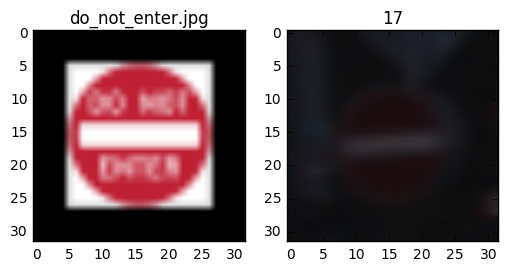

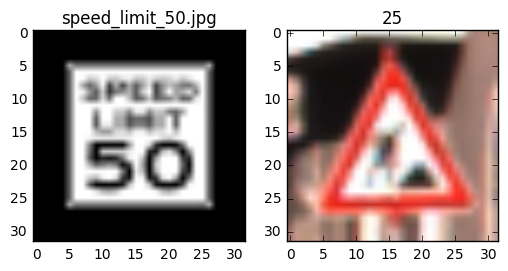

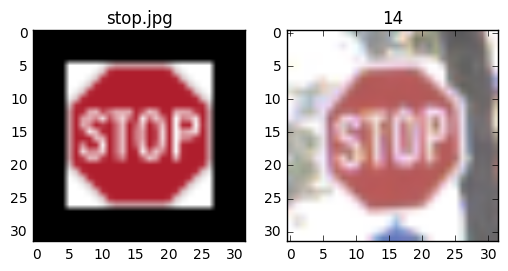

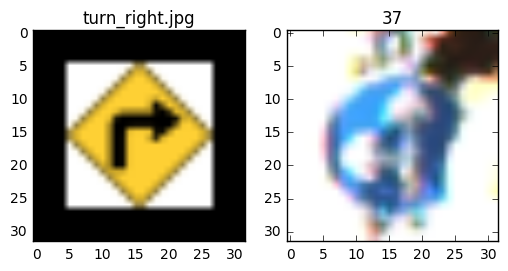

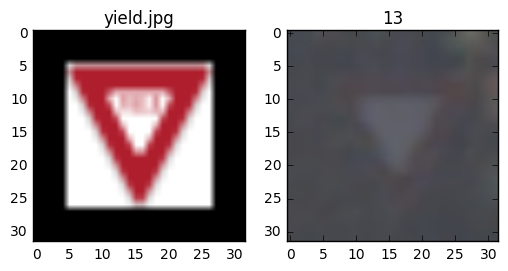

In [44]:
# display the result

for index, name in enumerate(img_names):
    extra_imgs[index] = img_import4(img_folder + name)
    fig = plt.figure()
    a=fig.add_subplot(1,2,1)
    a.set_title(name)
    plt.imshow(extra_imgs[index])
    
    # display an image from the training set that matches
    img_val = soln_vals[index]
    training_index = next(index for index, val in enumerate(y_train) if val==img_val)
    a=fig.add_subplot(1,2,2)
    a.set_title(str(img_val))
    plt.imshow(X_train[training_index])


### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**
I performed pretty well. What we see is the overall shape of the size is a bigger deteminate for the network than the detains inside the sign.
* For the US signs that match the shapes of the German signs (Do Not Enter, Stop, Yeild), we got good matches
* For the US signs where we needed to match features inside the signs (Speed Limit 50, Turn Right), we didn't get a match

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

[[17  9 39 19 41]
 [25 39 28 19 31]
 [14 39 16 17  0]
 [37 39 14 29 41]
 [13 38 25 35 11]]


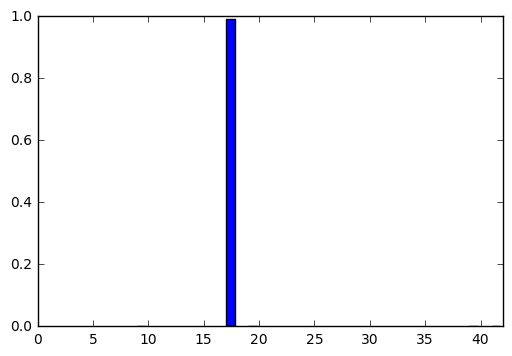

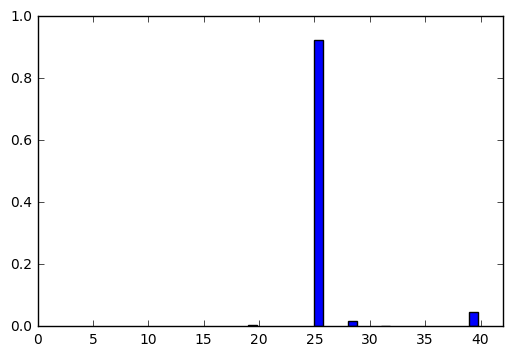

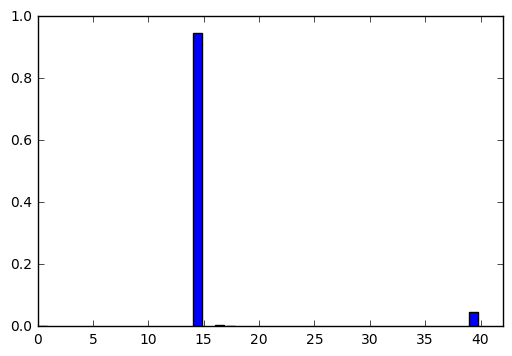

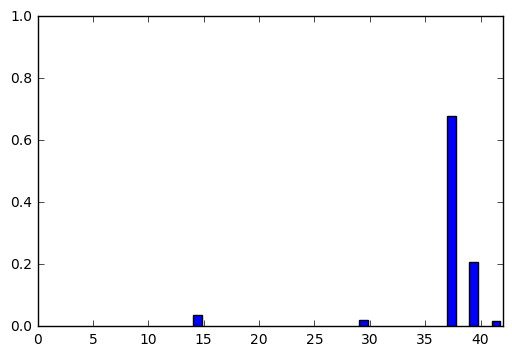

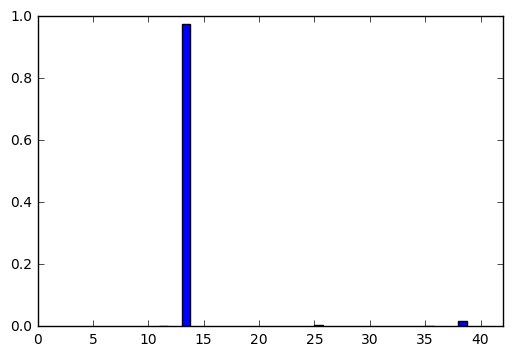

In [46]:
topFive_values = soln_topFive.values
topFive_indices = soln_topFive.indices

print(topFive_indices)

for index, vals_array in enumerate(topFive_values):
    y = vals_array
    x = topFive_indices[index][:]
    fig = plt.figure()    
    plt.bar(x, y, color="blue")
    plt.axis([0, 42, 0, 1])
    #fig.set_title(name)


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

The model is very certain for:
* Do Not Enter
* Stop
* Turn Right
* Yield

The model is uncertain for:
* Speed Limit 50

The model is incorrect for:
* Speed Limit 50 (correct answer = 2 )
* Turn Right     (correct answer = 33)

For Speed Limit 50, 2="Speed limit (50km/h)" doesn't not show up.

For Turn Right, 33="Turn right ahead" doesn't show up.

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

I do the following:
* I use matplotlib.image to import the images
* I use opencv to resize the images to 22x22
* I use opencv to add a 5 pixel black border on all sides to make the images 32x32
* I then put the images in a numpy ndarray
* I grayscale the images
* I normalize the images with values between 0.1-0.9

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.